In [44]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

In [45]:
df = pd.read_csv("Dataset/Preprocessed.csv")

In [46]:
print(df)

        age  workclass  fnlwgt  education  education-num  marital-status  \
0      39.0          5   77516          9             12               4   
1      50.0          4   83311          9             12               2   
2      38.0          2  215646         11              8               0   
3      53.0          2  234721          1              6               2   
4      28.0          2  338409          9             12               2   
...     ...        ...     ...        ...            ...             ...   
43886  33.0          2  245211          9             12               4   
43887  39.0          2  215419          9             12               0   
43888  38.0          2  374983          9             12               2   
43889  44.0          2   83891          9             12               0   
43890  35.0          3  182148          9             12               2   

       occupation  relationship  race  sex  capital-gain  capital-loss  \
0            

In [47]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,5,77516,9,12,4,0,1,4,1,2174.000000,1872.178505,40,38,0
1,50.0,4,83311,9,12,2,3,0,4,1,13142.185488,1872.178505,13,38,0
2,38.0,2,215646,11,8,0,5,1,4,1,13142.185488,1872.178505,40,38,0
3,53.0,2,234721,1,6,2,5,0,2,1,13142.185488,1872.178505,40,38,0
4,28.0,2,338409,9,12,2,9,5,2,0,13142.185488,1872.178505,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43886,33.0,2,245211,9,12,4,9,3,4,1,13142.185488,1872.178505,40,38,0
43887,39.0,2,215419,9,12,0,9,1,4,0,13142.185488,1872.178505,36,38,0
43888,38.0,2,374983,9,12,2,9,0,4,1,13142.185488,1872.178505,50,38,0
43889,44.0,2,83891,9,12,0,0,3,1,1,5455.000000,1872.178505,40,38,0


In [48]:
x = df.drop('income', axis=1)
y = df['income']

In [49]:
x

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39.0,5,77516,9,12,4,0,1,4,1,2174.000000,1872.178505,40,38
1,50.0,4,83311,9,12,2,3,0,4,1,13142.185488,1872.178505,13,38
2,38.0,2,215646,11,8,0,5,1,4,1,13142.185488,1872.178505,40,38
3,53.0,2,234721,1,6,2,5,0,2,1,13142.185488,1872.178505,40,38
4,28.0,2,338409,9,12,2,9,5,2,0,13142.185488,1872.178505,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43886,33.0,2,245211,9,12,4,9,3,4,1,13142.185488,1872.178505,40,38
43887,39.0,2,215419,9,12,0,9,1,4,0,13142.185488,1872.178505,36,38
43888,38.0,2,374983,9,12,2,9,0,4,1,13142.185488,1872.178505,50,38
43889,44.0,2,83891,9,12,0,0,3,1,1,5455.000000,1872.178505,40,38


In [50]:
y

0        0
1        0
2        0
3        0
4        0
        ..
43886    0
43887    0
43888    0
43889    0
43890    1
Name: income, Length: 43891, dtype: int64

In [51]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [52]:
len(X_test), len(X_train), len(y_test), len(y_train)

(8779, 35112, 8779, 35112)

# Random Forest

In [53]:
# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 75, 100],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2'] 
}

In [54]:
# Random Forest Classifier 
rf_model = RandomForestClassifier(random_state=42)

In [55]:
# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

In [56]:
# Perform grid search on the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [50, 75, 100]},
             scoring='accuracy')

In [57]:
# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [58]:
# Get the best model from grid search
best_rf_model = grid_search.best_estimator_

In [59]:
# Make predictions on the training set using the best model
best_rf_train_predictions = best_rf_model.predict(X_train)

In [60]:
# Calculate accuracy for the training set
best_rf_train_accuracy = accuracy_score(y_train, best_rf_train_predictions)
print("Best Random Forest Training Accuracy:", best_rf_train_accuracy)

Best Random Forest Training Accuracy: 0.8874174071542492


In [61]:
# Make predictions on the test set using the best model
best_rf_predictions = best_rf_model.predict(X_test)

In [62]:
# Calculate accuracy for the test set
best_rf_test_accuracy = accuracy_score(y_test, best_rf_predictions)
print("Best Random Forest Test Accuracy:", best_rf_test_accuracy)

Best Random Forest Test Accuracy: 0.8573869461214262


In [63]:
# Get predicted probabilities for the positive class
rf_probabilities = best_rf_model.predict_proba(X_test)[:, 1]

In [64]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_probabilities)

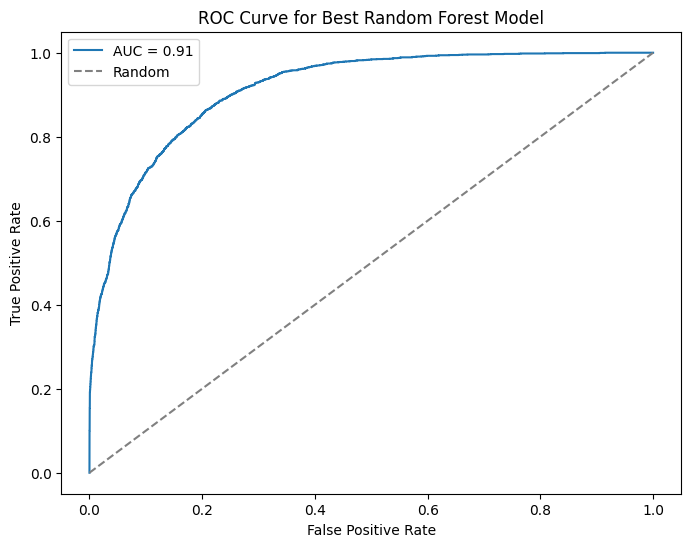

In [65]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, rf_probabilities):.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best Random Forest Model')
plt.legend()
plt.show()

In [66]:
# Get feature importances from the trained Random Forest model
feature_importances = best_rf_model.feature_importances_

In [67]:
# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

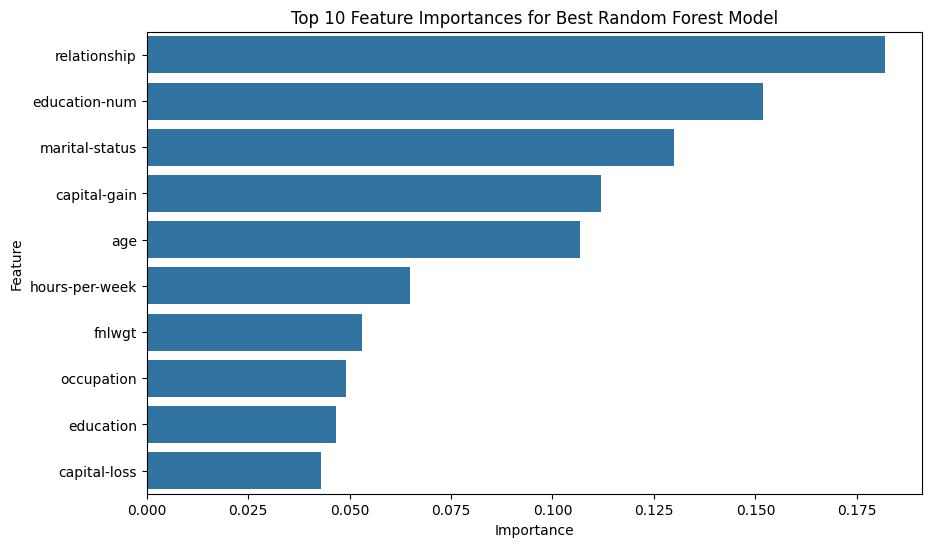

In [68]:
# Plot the top N most important features
top_features = 10
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(top_features))
plt.title(f'Top {top_features} Feature Importances for Best Random Forest Model')
plt.show()

In [69]:
# Get the confusion matrix
cm = confusion_matrix(y_test, best_rf_predictions)

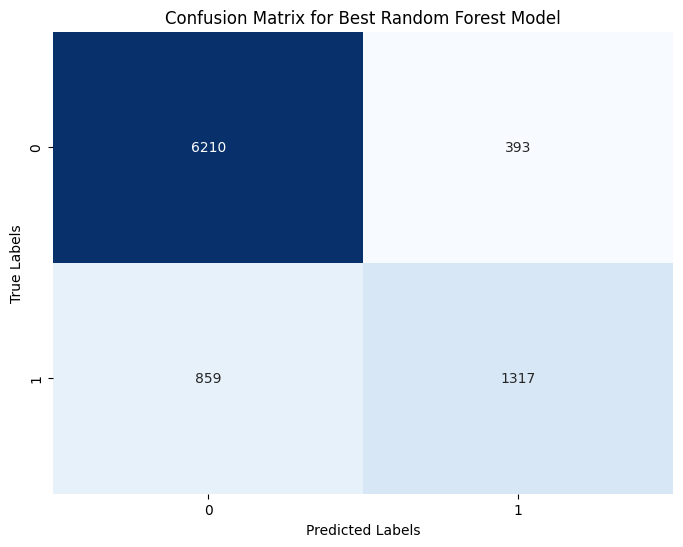

In [70]:
# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Best Random Forest Model')
plt.show()

In [71]:
# Generate classification report
report = classification_report(y_test, best_rf_predictions)

# Print classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      6603
           1       0.77      0.61      0.68      2176

    accuracy                           0.86      8779
   macro avg       0.82      0.77      0.79      8779
weighted avg       0.85      0.86      0.85      8779



# Naïve Bayes

In [72]:
nb_model = GaussianNB()

In [73]:
nb_model.fit(X_train, y_train)

GaussianNB()

In [74]:
nb_train_predictions = nb_model.predict(X_train)
nb_test_predictions = nb_model.predict(X_test)

In [75]:
nb_train_accuracy = accuracy_score(y_train, nb_train_predictions)
print("Naïve Bayes Training Accuracy:", nb_train_accuracy)


Naïve Bayes Training Accuracy: 0.7563511050353156


In [76]:
nb_test_accuracy = accuracy_score(y_test, nb_test_predictions)
print("Naïve Bayes Test Accuracy:", nb_test_accuracy)

Naïve Bayes Test Accuracy: 0.7568060143524319


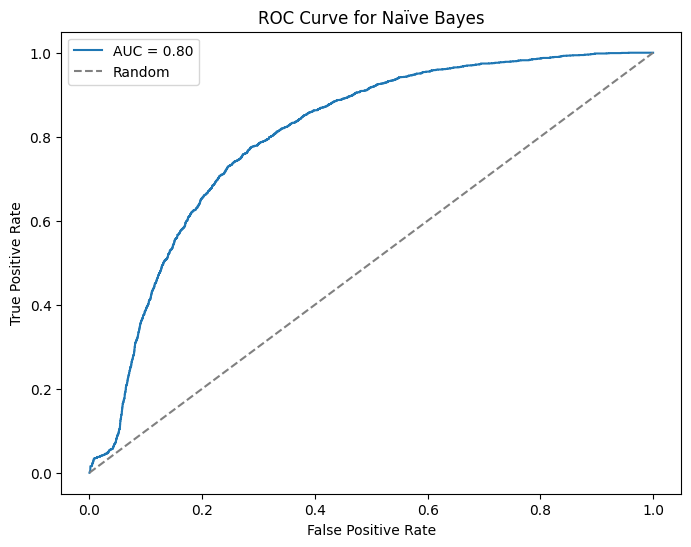

In [77]:
# Get predicted probabilities for the positive class
nb_probabilities = nb_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr_nb, tpr_nb, thresholds = roc_curve(y_test, nb_probabilities)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, label=f'AUC = {roc_auc_score(y_test, nb_probabilities):.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naïve Bayes')
plt.legend()
plt.show()

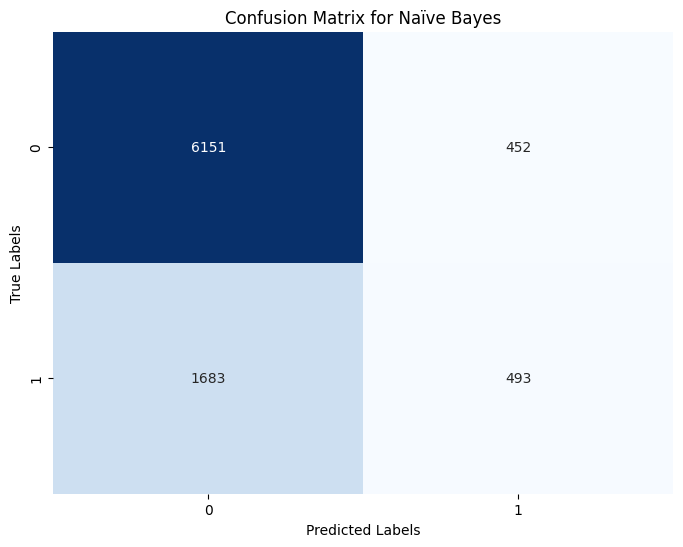

In [78]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get the confusion matrix
cm_nb = confusion_matrix(y_test, nb_test_predictions)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Naïve Bayes')
plt.show()


In [83]:
# Generate classification report
report = classification_report(y_test, nb_test_predictions)

# Print classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.93      0.85      6603
           1       0.52      0.23      0.32      2176

    accuracy                           0.76      8779
   macro avg       0.65      0.58      0.58      8779
weighted avg       0.72      0.76      0.72      8779



# Comparing models 

In [79]:
# Calculate accuracy for Naïve Bayes
nb_accuracy = accuracy_score(y_test, nb_test_predictions)
print("Naïve Bayes Accuracy:", nb_accuracy)

# Calculate accuracy for Random Forest
rf_accuracy = accuracy_score(y_test, best_rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)


Naïve Bayes Accuracy: 0.7568060143524319
Random Forest Accuracy: 0.8573869461214262


In [80]:
# Naïve Bayes
nb_classification_report = classification_report(y_test, nb_test_predictions)
print("Naïve Bayes Classification Report:\n", nb_classification_report)

# Random Forest
rf_classification_report = classification_report(y_test, best_rf_predictions)
print("Random Forest Classification Report:\n", rf_classification_report)


Naïve Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.93      0.85      6603
           1       0.52      0.23      0.32      2176

    accuracy                           0.76      8779
   macro avg       0.65      0.58      0.58      8779
weighted avg       0.72      0.76      0.72      8779

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      6603
           1       0.77      0.61      0.68      2176

    accuracy                           0.86      8779
   macro avg       0.82      0.77      0.79      8779
weighted avg       0.85      0.86      0.85      8779



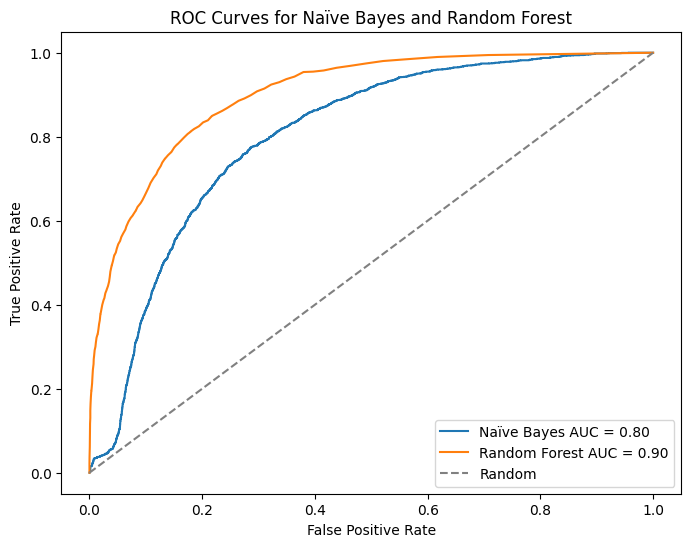

In [81]:
# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Get predicted probabilities for Random Forest
rf_probabilities = rf_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probabilities)

# Calculate AUC for Random Forest
auc_rf = roc_auc_score(y_test, rf_probabilities)

# Calculate AUC for Naïve Bayes
auc_nb = roc_auc_score(y_test, nb_probabilities)

# Plot ROC curve for Random Forest
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, label=f'Naïve Bayes AUC = {auc_nb:.2f}')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest AUC = {auc_rf:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Naïve Bayes and Random Forest')
plt.legend()
plt.show()